<a href="https://colab.research.google.com/github/aiswaryapaul/hierarchial-clustering/blob/main/Hierarchical_clustering_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Importing the required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning related packages
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### **2. Reading and Exploring the data**

In [ ]:
customers = pd.read_csv('Mall_Customers.csv')

In [ ]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customers.drop(columns = 'CustomerID', inplace = True)

In [ ]:
customers.dtypes #check the datatypes of the values in each column

,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
customers.isnull().sum(axis = 0)  #print the total number of missing values column-wise

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
customers.isnull().sum(axis = 1)  #print the total number of missing values row-wise

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,0


In [ ]:
customers.isnull().sum(axis = 1) > 10 #mark all the rows as TRUE which has more than 10 missing values

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
customers[customers.isnull().sum(axis = 1) > 10]  #print all the rows which have more than 10 missing values

,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [ ]:
#check for the duplicates
customers.duplicated().sum()

np.int64(0)

In [ ]:
customers.drop_duplicates(inplace = True)

##### **Encode the gender column using Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
customers['Gender'] = le.fit_transform(customers['Gender'])

#### **Check for outliers**

In [ ]:
customers.describe()  #statistical description of the data which can also be used to check for outliers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


**We can do two things to deal with outliers**

1. Remove the outliers
2. We can transform the data so that the effect of outliers is neutralized.
  - 2.1. Log Transformation
  - 2.2. Square Root transformation
  - 2.3. Box-Cox Transformation

In [ ]:
customers['Income_log'] = np.log(customers['Annual Income (k$)'])

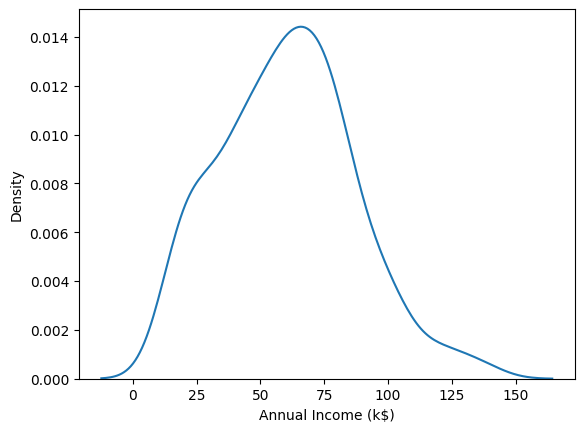

In [ ]:
sns.kdeplot(x = 'Annual Income (k$)', data = customers)
plt.show()

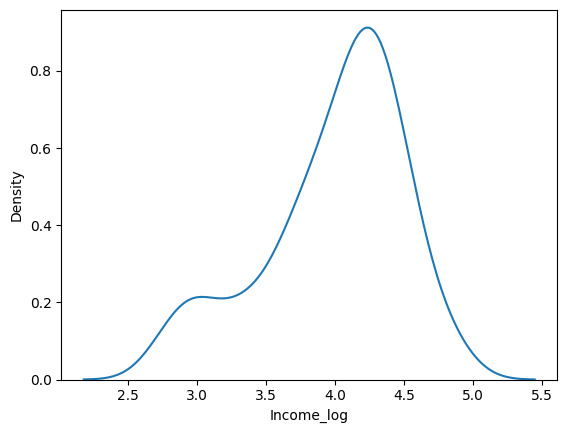

In [ ]:
sns.kdeplot(x = 'Income_log', data = customers)
plt.show()

### **3. Machine learning Process**

In [ ]:
X = customers.values  #.values is to convert the data into array form

#### **Make the dendrogram using the linkage process**

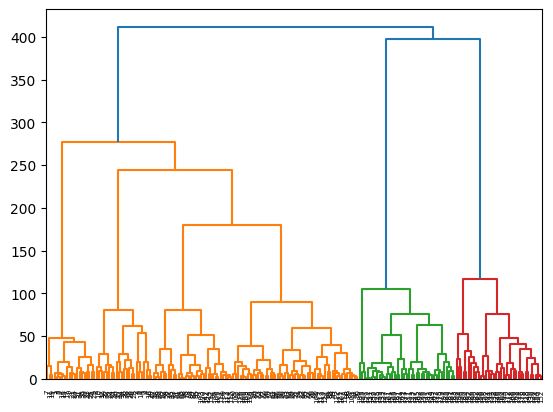

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

**Observation** : The optimal number of clusters on this data is **3**.

#### **Apply AgglomerativeClustering on the data**

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

In [ ]:
y = agg_cluster.fit_predict(X)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [ ]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [ ]:
final_df = pd.concat([customers, output], axis = 1)

In [ ]:
final_df.drop(columns = 'Income_log', inplace = True)

In [ ]:
final_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
X = final_df.drop(columns = 'Cluster Number')
y = final_df['Cluster Number']